In [1]:
import pandas as pd
import numpy as np

def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

filename = '../HashtagNetwork/allseason_20k_rawdata.json'
allseason = pd.read_json(filename)
base_df = allseason[['id','username','hashtags']]

base_df.index = base_df['id']
base_df = base_df.drop(columns=['username'])
base_df = base_df.drop(columns=['id'])

fashion_df = base_df[base_df.astype(str)['hashtags'] != '[]']

tag_df = list(fashion_df['hashtags'])
for i in range(len(tag_df)):
    tag_df[i] = list(set(tag_df[i]))
    
fashion_df['hashtags'] = tag_df

fashion_dict = getTagsDict(fashion_df)
fashion_dict_top = fashion_dict[-1000:]
fashion_top = []
for i in fashion_dict_top:
    fashion_top.append(i[0])

post_id = fashion_df.index.values
    
def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(
        0, index = np.arange(0,len(df)),columns=taglist)    
    
    for i in range(len(df)):
        list_of_row = list(df.iloc[i])[0]
        
        for tag in list_of_row:
            if tag in taglist:
                result_df[tag][i] = 1
        
    return result_df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
import time
start_time = time.time()

before_corr = get_DataFrame_for_affinity(fashion_df,fashion_top)

print("--- %s seconds ---" % (time.time() - start_time))

--- 58.91407322883606 seconds ---


In [3]:
before_corr.head()

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,fashionista,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1


In [4]:
before_corr['post_id'] = pd.DataFrame(post_id)

In [5]:
before_corr.head()

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion,post_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,BtOm-dkHn5v
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,BtQp-IfHkzq
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,BtRdH3UBQ6i
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,BtOpNQpApMI
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,BtRHyjZAem6


In [6]:
summerfashion = ['summerlove', 'hot', 'summervibes', 'bikini', 'swimsuit',
                'beachvibes', 'bikinigirl', 'beachlife', 'beachwear', 'summer',
                'summerfashion', 'beach', 'sea', 'summertime', 'beachbody',
                'ocean', 'summerdays', 'summerbody', 'swimwear']

In [7]:
summer_onehot = pd.DataFrame(before_corr.loc[0])
summer_onehot = summer_onehot.T
summer_onehot

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion,post_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,BtOm-dkHn5v


In [8]:
for tag in fashion_top:
    summer_onehot[tag] = 0

for tag in summerfashion:
    summer_onehot[tag] = 1
    
summer_onehot

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion,post_id
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,BtOm-dkHn5v


In [9]:
before_corr.head()

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion,post_id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,BtOm-dkHn5v
1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,BtQp-IfHkzq
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,1,BtRdH3UBQ6i
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,BtOpNQpApMI
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,BtRHyjZAem6


In [10]:
before_corr = before_corr.drop(columns=['post_id'])

In [11]:
summer_onehot = summer_onehot.drop(columns=['post_id'])

In [12]:
resultlist = []
for index, row in before_corr.iterrows():
    logical_and = row & summer_onehot
    resultlist.append(logical_and)

In [13]:
len(resultlist)

17644

In [18]:
resultlist[0]

,newin,izmir,beachvibes,1950sfashion,australiandesigner,home,summerwear,hijabstyle,natural,suit,...,fashionista,instafashion,fashionblogger,ootd,style,fallfashion,summerfashion,springfashion,winterfashion,fashion
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
len(post_id)

17644

In [25]:
sumlist = []
for row in resultlist:
    sumvalue = row.sum(axis = 1)
    sumlist.append(sumvalue)

<function matplotlib.pyplot.show(*args, **kw)>

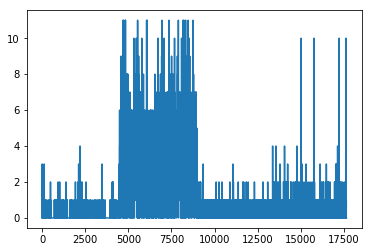

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sumlist)
plt.show

In [32]:
resultpd = pd.DataFrame(sumlist, post_id)

In [37]:
resultpd.sort_values(by=0, ascending = False)

,0
BtIiSvNHHQg,11
BtGI90HgPMv,11
BrmB4GRDs6z,11
Bs1ooMsF2_8,11
Bs5l0uBDctC,11
Bs0lrqlnXwS,11
BtHc3JNHe63,11
Bs-Y0nVhhR6,11
BtFU8XVlnVw,11
BVxeqg3BTdl,11


In [38]:
len(summerfashion)

19